
# Indexes and Depths by Region

A brief analysis of the indexes, both in their raw form and in a 'debiased' form, where we try to see what a principal concentrates on, by substracting their bias in answering with high (or low) ratings to every question and, therefore, how is that school unique wrt the others.

A simple visualization is then possible with the italian map, by looking at one particular biased and debiased index, the bias or the average depth of the schools of every region, which can lead to some interesting insights in the different behaviors of principals when answering the questions.

The last part of this notebook depends on the run of the R notebook Depth_presidi.png

In [1]:
import sys
import geopandas as gpd
import pandas as pd
import numpy as np
italy = gpd.read_file('../Data/italian-maps-shapefiles-master/italy-with-regions/reg2011_g.shp')
df = pd.read_csv('../Data/gppp.csv')

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
%%capture

italy['NOME_REG'][1] = "VALLE D'AOSTA"
italy['NOME_REG'][3] = "TRENTINO-ALTO ADIGE"
italy['NOME_REG'][5] = "FRIULI-VENEZIA GIULIA"

In [3]:
data = df.iloc[:,1:18].join(df[['prov','Nome_reg','Fattore_correzione','Sud','Nord','ESCS_mean','mate8_median','ita8_median','mate6_median','ita6_median']])

<Figure size 864x648 with 0 Axes>

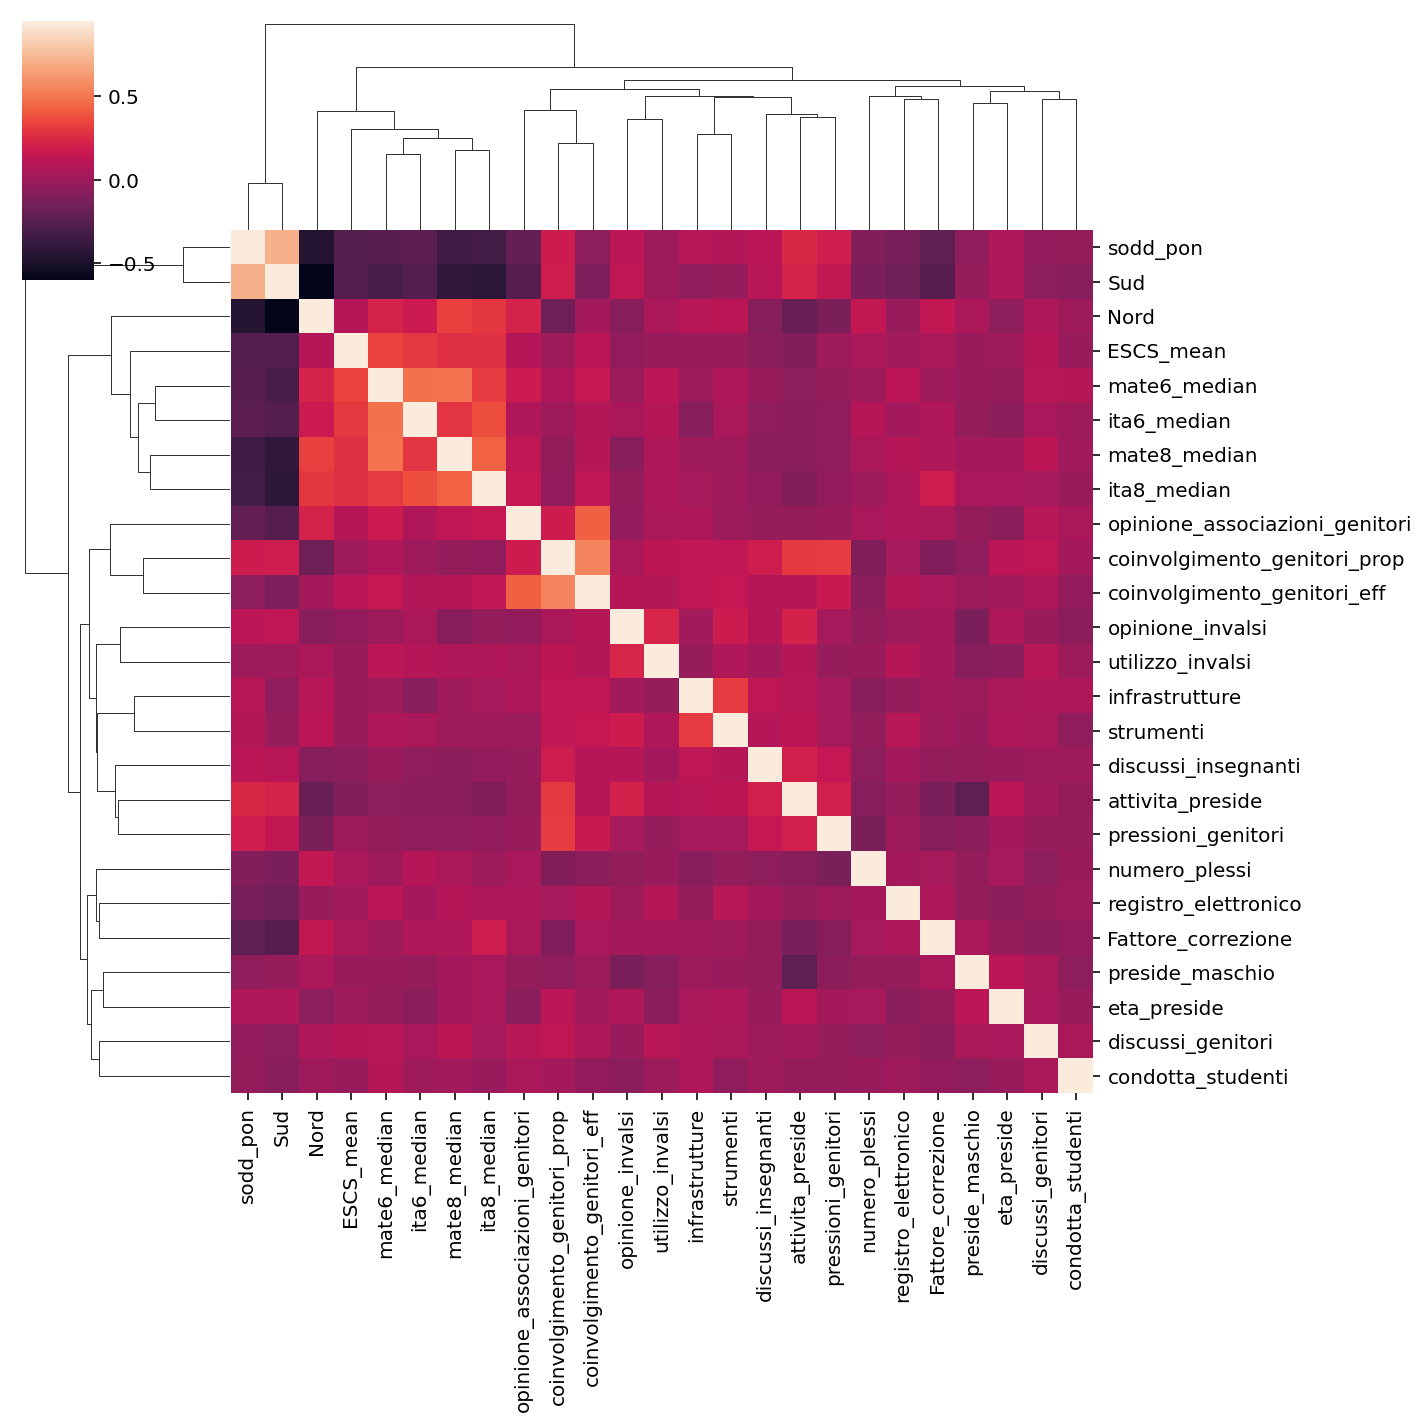

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = data.corr(method='spearman')
plt.figure(figsize=(12,9))
sns.clustermap(corrmat, vmax=0.95)

In [12]:
corrmat

,opinione_invalsi,utilizzo_invalsi,discussi_insegnanti,discussi_genitori,sodd_pon,attivita_preside,pressioni_genitori,coinvolgimento_genitori_prop,opinione_associazioni_genitori,coinvolgimento_genitori_eff,condotta_studenti,registro_elettronico,numero_plessi,infrastrutture,strumenti,preside_maschio,eta_preside,Fattore_correzione,Sud,Nord,ESCS_mean,mate8_median,ita8_median,mate6_median,ita6_median
opinione_invalsi,1.000000,0.232704,0.083898,-0.009531,0.116929,0.215879,0.039058,0.054454,-0.034033,0.087231,-0.060239,0.012237,-0.028091,0.021516,0.175658,-0.121855,0.070343,0.024959,0.126767,-0.070436,-0.035267,-0.072210,-0.026176,0.002093,0.048519
utilizzo_invalsi,0.232704,1.000000,0.023671,0.104462,0.012422,0.085583,-0.015186,0.123662,0.048887,0.080676,0.001811,0.083200,-0.006747,-0.017797,0.070260,-0.078111,-0.052328,0.023513,0.004889,0.053276,-0.008868,0.072457,0.068865,0.118172,0.092763
discussi_insegnanti,0.083898,0.023671,1.000000,0.006963,0.107380,0.204361,0.144734,0.184991,-0.017555,0.093964,0.007903,0.024150,-0.045867,0.125476,0.084216,-0.021164,-0.013563,-0.028939,0.104735,-0.077788,-0.055843,-0.059416,-0.033851,-0.012169,-0.044332
discussi_genitori,-0.009531,0.104462,0.006963,1.000000,-0.033923,0.016202,-0.014993,0.128320,0.100692,0.074535,0.048111,-0.025759,-0.049663,0.064582,0.057005,0.046791,0.044418,-0.055352,-0.048912,0.072223,0.091665,0.121089,0.038956,0.102948,0.043966
sodd_pon,0.116929,0.012422,0.107380,-0.033923,1.000000,0.244930,0.187434,0.179019,-0.203934,-0.049385,-0.031679,-0.134001,-0.091192,0.106581,0.078557,-0.040048,0.071157,-0.226199,0.715655,-0.454923,-0.272012,-0.346822,-0.328183,-0.248925,-0.230204
attivita_preside,0.215879,0.085583,0.204361,0.016202,0.244930,1.000000,0.202688,0.307926,-0.024887,0.083732,-0.022651,-0.016963,-0.078840,0.105370,0.120976,-0.225468,0.110665,-0.120824,0.216332,-0.183312,-0.090383,-0.066436,-0.096553,-0.048940,-0.052976
pressioni_genitori,0.039058,-0.015186,0.144734,-0.014993,0.187434,0.202688,1.000000,0.315109,-0.013754,0.162610,-0.014796,0.011693,-0.116113,0.039025,0.040101,-0.054204,0.032375,-0.078995,0.138068,-0.115087,0.009614,-0.038628,-0.038460,-0.031470,-0.042762
coinvolgimento_genitori_prop,0.054454,0.123662,0.184991,0.128320,0.179019,0.307926,0.315109,1.000000,0.176739,0.551622,0.031881,0.037793,-0.098609,0.137128,0.134741,-0.043367,0.114861,-0.104889,0.179966,-0.168303,0.014844,-0.028442,-0.034875,0.065444,0.008377
opinione_associazioni_genitori,-0.034033,0.048887,-0.017555,0.100692,-0.203934,-0.024887,-0.013754,0.176739,1.000000,0.428804,0.055097,0.064322,0.045017,0.060398,-0.001892,-0.025106,-0.055086,0.057067,-0.253389,0.218737,0.087130,0.125487,0.154689,0.172051,0.067480
coinvolgimento_genitori_eff,0.087231,0.080676,0.093964,0.074535,-0.049385,0.083732,0.162610,0.551622,0.428804,1.000000,-0.037822,0.078266,-0.054962,0.127845,0.143549,-0.001540,0.021170,0.042597,-0.110576,0.026405,0.107542,0.094188,0.135489,0.154250,0.082659


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_cl = data.drop(columns = ['mate8_median','ita8_median','mate6_median','ita6_median','prov','Nome_reg'])
df_cl.dropna(inplace = True)

cl = KMeans(n_clusters=3, random_state=10)
cluster_labels = cl.fit_predict(df_cl)

In [5]:
indici_raw = data.drop(columns = ['mate8_median','ita8_median','mate6_median','ita6_median','prov','Nome_reg', 'discussi_insegnanti','discussi_genitori',
                             'opinione_associazioni_genitori', 'registro_elettronico','preside_maschio','eta_preside','Fattore_correzione',
                             'Sud','Nord','ESCS_mean', 'sodd_pon','numero_plessi' ])
                             #,'pressioni_genitori'])
indici = indici_raw.copy()

In [6]:
scaler = MinMaxScaler()
ind = scaler.fit_transform(indici)
indici = pd.DataFrame(ind, columns = indici.columns)

item_biases = indici.mean()
indici = indici - item_biases

user_biases = indici.mean(axis = 1)
for i in range(indici.shape[1]):
    indici.iloc[:,i] = indici.iloc[:,i] - user_biases
indici['user_bias'] = user_biases

In [7]:
indici['Sud'] = df['Sud']
indici_raw['Sud'] = df['Sud']

In [8]:
indici['preside_maschio'] = df['preside_maschio']
indici_raw['preside_maschio'] = df['preside_maschio']

In [9]:
indici

,opinione_invalsi,utilizzo_invalsi,attivita_preside,pressioni_genitori,coinvolgimento_genitori_prop,coinvolgimento_genitori_eff,condotta_studenti,infrastrutture,strumenti,user_bias,Sud,preside_maschio
0,0.046776,0.110387,-0.126346,0.753878,0.089017,-0.176695,0.000585,-0.312422,-0.385180,0.001441,1,1
1,-0.219046,0.367293,-0.025691,-0.239217,-0.056252,-0.096619,0.140823,0.069484,0.059225,-0.005464,0,0
2,0.072219,0.052497,-0.038404,-0.220679,-0.081192,-0.151252,-0.173972,0.213021,0.327763,-0.024001,1,1
3,0.074745,0.047447,0.216964,-0.309062,0.047816,-0.142074,0.137645,-0.125362,0.051880,0.064381,1,1
4,0.155648,0.385926,0.076276,-0.137250,0.002237,-0.116604,0.176124,-0.328550,-0.213808,-0.107431,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
653,0.219657,0.101450,-0.260284,-0.255060,-0.267746,-0.210023,0.324981,0.053641,0.293383,0.010379,0,0
654,0.116942,-0.001265,-0.112999,0.642225,-0.240027,-0.239568,-0.244401,0.075926,0.003167,0.113094,0,0
655,0.187645,-0.097229,0.113954,-0.287072,0.069807,0.099428,-0.307031,0.021629,0.198870,0.042391,0,0
656,0.111649,-0.074740,0.032277,-0.181249,0.066934,0.180861,-0.067875,0.002451,-0.070307,-0.063432,0,0


In [10]:
indici_raw.groupby('Sud').mean()

,opinione_invalsi,utilizzo_invalsi,attivita_preside,pressioni_genitori,coinvolgimento_genitori_prop,coinvolgimento_genitori_eff,condotta_studenti,infrastrutture,strumenti,preside_maschio
Sud,,,,,,,,,,
0,1.663095,1.912500,2.071259,0.200000,1.053274,1.544841,0.726190,0.778571,1.525000,0.323810
1,1.720063,1.918067,2.268607,0.323529,1.223739,1.449346,0.681273,0.759358,1.494538,0.306723


In [11]:
indici.groupby('Sud').mean()

,opinione_invalsi,utilizzo_invalsi,attivita_preside,pressioni_genitori,coinvolgimento_genitori_prop,coinvolgimento_genitori_eff,condotta_studenti,infrastrutture,strumenti,user_bias,preside_maschio
Sud,,,,,,,,,,,
0,-0.006783,0.007532,-0.023027,-0.036478,-0.013243,0.023367,0.015785,0.017758,0.015089,-0.008203,0.323810
1,0.011970,-0.013291,0.040635,0.064373,0.023371,-0.041236,-0.027855,-0.031338,-0.026628,0.014476,0.306723


In [12]:
indici_raw.groupby('preside_maschio').mean()

,opinione_invalsi,utilizzo_invalsi,attivita_preside,pressioni_genitori,coinvolgimento_genitori_prop,coinvolgimento_genitori_eff,condotta_studenti,infrastrutture,strumenti,Sud
preside_maschio,,,,,,,,,,
0,1.706292,1.952116,2.211899,0.260579,1.130707,1.511383,0.723194,0.771614,1.514477,0.367483
1,1.635167,1.833732,1.993848,0.210526,1.081041,1.507974,0.681476,0.771640,1.512919,0.349282


In [13]:
indici.groupby('preside_maschio').mean()

,opinione_invalsi,utilizzo_invalsi,attivita_preside,pressioni_genitori,coinvolgimento_genitori_prop,coinvolgimento_genitori_eff,condotta_studenti,infrastrutture,strumenti,user_bias,Sud
preside_maschio,,,,,,,,,,,
0,0.006696,0.002800,0.020567,0.006164,-0.004247,-0.009259,-0.003550,-0.009746,-0.009425,0.009734,0.367483
1,-0.014385,-0.006015,-0.044184,-0.013242,0.009124,0.019891,0.007627,0.020937,0.020248,-0.020912,0.349282


In [14]:
indici['Nome_reg'] = df['Nome_reg']
indici_raw['Nome_reg'] = df['Nome_reg']

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_variable(string, df):
    regioni = df.groupby(by = ['Nome_reg']).mean()[string]
    regioni.index = regioni.index.str.upper()
    indice = regioni.index.tolist()
    regioni['TRENTINO-ALTO ADIGE'] = np.nanmean([regioni['PROV. AUT. BOLZANO (L. IT.)'], regioni['PROV. AUT. TRENTO']])
    regioni.drop(labels = ['PROV. AUT. BOLZANO (L. IT.)',  'PROV. AUT. TRENTO'], inplace = True)
    regioni = pd.DataFrame(regioni)
    merge = italy.merge(regioni, left_on = 'NOME_REG', right_index = True)
    fig, ax = plt.subplots(1, figsize=(10, 10))
    col = string

    ax.set_title(
    col, 
    fontdict={'fontsize':'25', 'fontweight':3}, 
    color='Black', 
    fontfamily='monospace')

    merge.plot(
    ax=ax,
    column=col,
    cmap='Reds',
    label='ciao',
    legend=True,
    categorical=False
    )

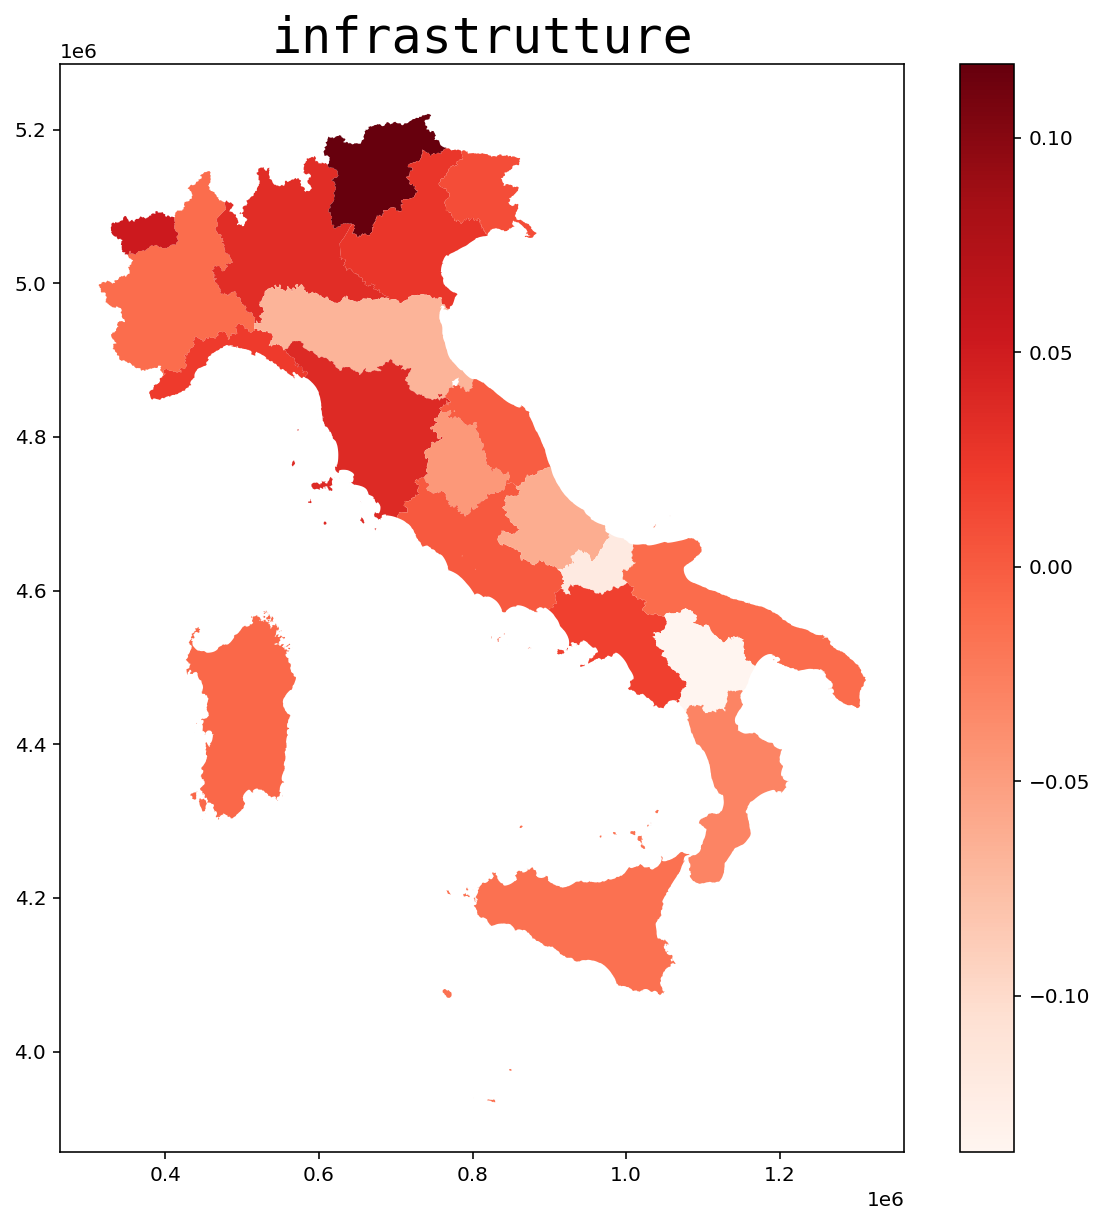

In [20]:
plot_variable('infrastrutture',indici)

In [26]:
indici_raw.to_csv('../Data/Indici_raw.csv', index = False)
indici.to_csv('../Data/Indici.csv', index = False)

In [ ]:
depths_raw = pd.read_csv('../Data/Depths_raw.csv')
depths_debias = pd.read_csv('../Data/Depths_debias.csv')

In [26]:
depths_raw['Nome_reg'] = df['Nome_reg']
depths_debias['Nome_reg'] = df['Nome_reg']

In [37]:
depths_debias.describe()

,tukey,mah,lp,local,spatial,potential,zonoid
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,0.008356,0.134876,0.387344,0.381789,0.317855,0.057538,0.016556
std,0.016514,0.063880,0.015881,0.021338,0.096398,0.026507,0.035999
min,0.000000,0.032433,0.344587,0.313758,0.109635,0.034801,0.001520
25%,0.000000,0.088017,0.376166,0.363960,0.245490,0.038379,0.001520
50%,0.001520,0.121380,0.393305,0.388388,0.311127,0.047467,0.001520
75%,0.009119,0.165724,0.398878,0.399608,0.381800,0.067617,0.016091
max,0.227964,0.621200,0.414979,0.415129,0.739256,0.167622,0.515970


In [38]:
depths_raw.describe()

,tukey,mah,lp,local,spatial,potential,zonoid
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,0.006640,0.119731,0.318850,0.302083,0.314553,0.044836,0.010319
std,0.011866,0.051555,0.017090,0.019252,0.087987,0.012412,0.021402
min,0.000000,0.032479,0.249999,0.219873,0.119195,0.034800,0.001211
25%,0.000000,0.081048,0.310260,0.290220,0.249274,0.035952,0.001520
50%,0.001520,0.110240,0.322309,0.304402,0.308846,0.039743,0.001520
75%,0.007599,0.145554,0.330600,0.317128,0.369348,0.049325,0.007232
max,0.109422,0.340839,0.349807,0.341074,0.596565,0.104520,0.167996


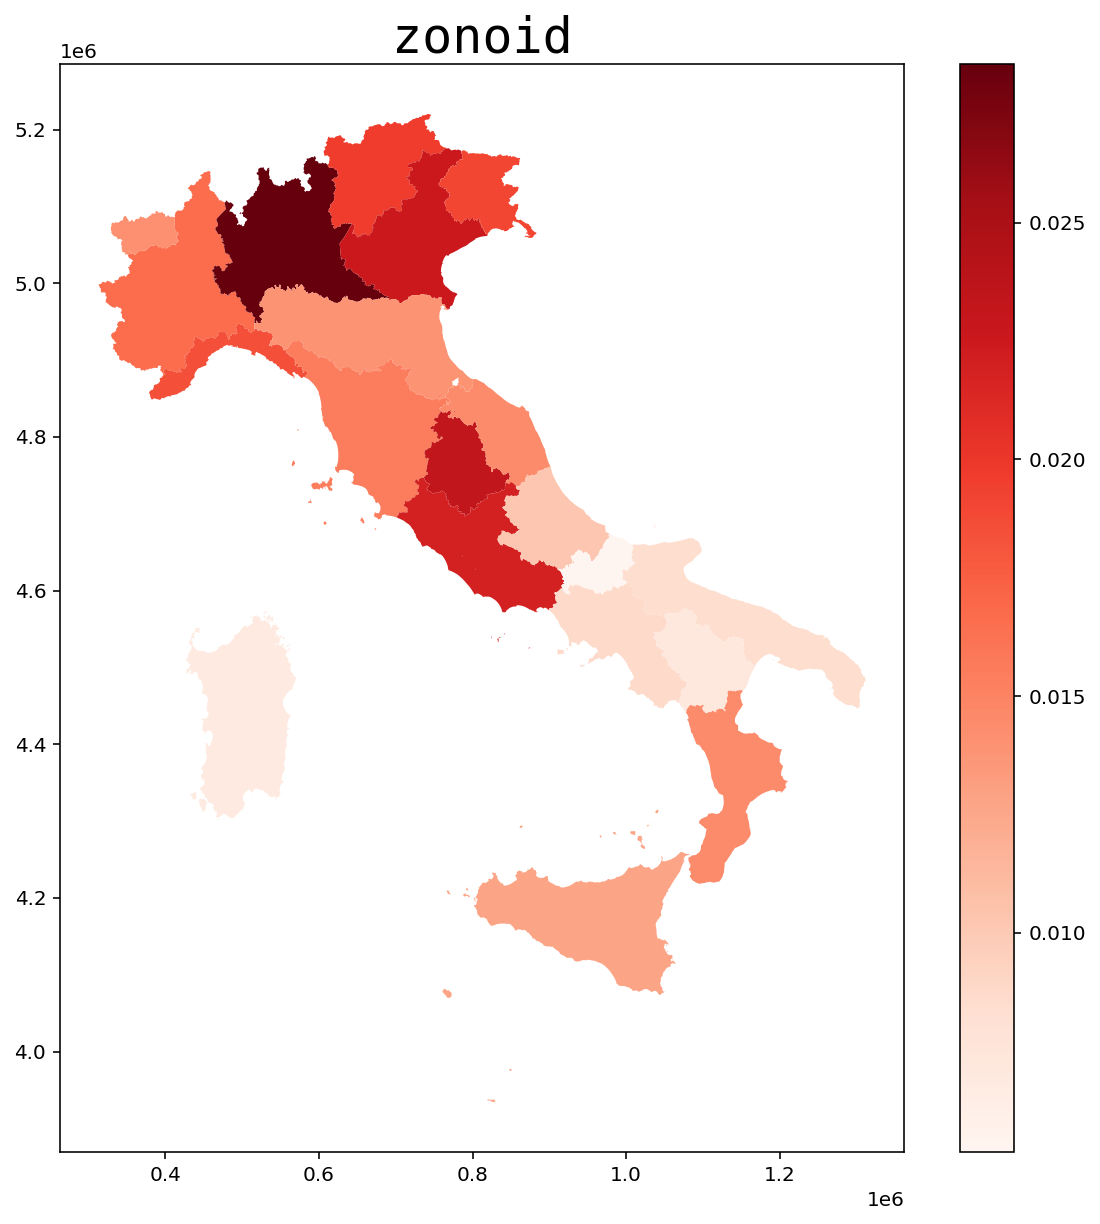

In [36]:
plot_variable('zonoid',depths_debias)